In [2]:
from docx import Document
import json
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the Flight Data from Docx Files and Storing into CSV (Train and Test Data)


In [34]:
def process_folder(folder_path, output_file):
    if not os.path.exists(folder_path):
        raise FileNotFoundError(f"The folder '{folder_path}' does not exist. Please check the path.")
    
    all_flights = []

    for i in range(1, 73):  
        file_name = f"{i}.docx"
        file_path = os.path.join(folder_path, file_name)
        
        if not os.path.exists(file_path):
            continue
        
        doc = Document(file_path)
        content = "\n".join([paragraph.text for paragraph in doc.paragraphs])
        
        try:
            data = json.loads(content)
        except json.JSONDecodeError:
            print(f"File {file_name} contains invalid JSON. Skipping.")
            continue
        
        for entry in data:
            flight_data = {
                "type": entry.get("type"),
                "status": entry.get("status"),
                "departure_iataCode": entry["departure"].get("iataCode"),
                "departure_icaoCode": entry["departure"].get("icaoCode"),
                "departure_terminal": entry["departure"].get("terminal"),
                "departure_gate": entry["departure"].get("gate"),
                "departure_scheduledTime": entry["departure"].get("scheduledTime"),
                "departure_estimatedTime": entry["departure"].get("estimatedTime"),  
                "departure_actualTime": entry["departure"].get("actualTime"),  
                "departure_estimatedRunway": entry["departure"].get("estimatedRunway"),
                "departure_actualRunway": entry["departure"].get("actualRunway"),
                "arrival_iataCode": entry["arrival"].get("iataCode"),
                "arrival_icaoCode": entry["arrival"].get("icaoCode"),
                "arrival_terminal": entry["arrival"].get("terminal"),
                "arrival_gate": entry["arrival"].get("gate"),
                "arrival_baggage": entry["arrival"].get("baggage"),
                "arrival_scheduledTime": entry["arrival"].get("scheduledTime"),
                "arrival_estimatedTime": entry["arrival"].get("estimatedTime"),
                "arrival_actualTime": entry["arrival"].get("actualTime"),  
                "arrival_estimatedRunway": entry["arrival"].get("estimatedRunway"),  
                "arrival_actualRunway": entry["arrival"].get("actualRunway"),  
                "airline_name": entry["airline"].get("name"),
                "airline_iataCode": entry["airline"].get("iataCode"),
                "airline_icaoCode": entry["airline"].get("icaoCode"),
                "flight_number": entry["flight"].get("number"),
                "flight_iataNumber": entry["flight"].get("iataNumber"),
                "flight_icaoNumber": entry["flight"].get("icaoNumber"),
                "codeshared_airline_name": entry.get("codeshared", {}).get("airline", {}).get("name"),
                "codeshared_airline_iataCode": entry.get("codeshared", {}).get("airline", {}).get("iataCode"),
                "codeshared_airline_icaoCode": entry.get("codeshared", {}).get("airline", {}).get("icaoCode"),
                "codeshared_flight_number": entry.get("codeshared", {}).get("flight", {}).get("number"),
                "codeshared_flight_iataNumber": entry.get("codeshared", {}).get("flight", {}).get("iataNumber"),
                "codeshared_flight_icaoNumber": entry.get("codeshared", {}).get("flight", {}).get("icaoNumber")
            }
            
            all_flights.append(flight_data)

    flight_data = pd.DataFrame(all_flights)
    flight_data.to_csv(output_file, index=False)
    print(f"Flight data has been successfully exported to '{output_file}'.")
    return flight_data

test_folder = "Test"
test_output_file = "Data/test_flight_data.csv"
test_data = process_folder(test_folder, test_output_file)

train_folder = "Train"
train_output_file = "Data/train_flight_data.csv"
train_data = process_folder(train_folder, train_output_file)

Flight data has been successfully exported to 'Data/test_flight_data.csv'.
Flight data has been successfully exported to 'Data/train_flight_data.csv'.


In [36]:
train_data = pd.read_csv('Data/train_flight_data.csv')
train_data.head()

C:\Users\Hasnain Ibrar Butt\AppData\Local\Temp\ipykernel_18220\257705476.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('Data/train_flight_data.csv')


,type,status,departure_iataCode,departure_icaoCode,departure_terminal,departure_gate,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,...,airline_icaoCode,flight_number,flight_iataNumber,flight_icaoNumber,codeshared_airline_name,codeshared_airline_iataCode,codeshared_airline_icaoCode,codeshared_flight_number,codeshared_flight_iataNumber,codeshared_flight_icaoNumber
0,departure,active,lhe,opla,m,NaN,2023-07-20t20:50:00.000,2023-07-20t20:00:00.000,2023-07-20t20:15:00.000,2023-07-20t20:15:00.000,...,sva,737,sv737,sva737,NaN,NaN,NaN,NaN,NaN,NaN
1,departure,active,lhe,opla,NaN,NaN,2023-07-18t15:05:00.000,2023-07-18t15:05:00.000,NaN,NaN,...,fjl,843,9p843,fjl843,NaN,NaN,NaN,NaN,NaN,NaN
2,departure,active,lhe,opla,NaN,NaN,2023-07-23t09:50:00.000,NaN,NaN,NaN,...,fjl,841,9p841,fjl841,NaN,NaN,NaN,NaN,NaN,NaN
3,departure,active,lhe,opla,m,NaN,2023-07-26t23:30:00.000,2023-07-26t23:30:00.000,2023-07-26t23:51:00.000,2023-07-26t23:51:00.000,...,pia,205,pk205,pia205,NaN,NaN,NaN,NaN,NaN,NaN
4,departure,active,lhe,opla,m,NaN,2023-07-20t11:35:00.000,2023-07-20t17:15:00.000,NaN,NaN,...,sep,723,er723,sep723,NaN,NaN,NaN,NaN,NaN,NaN


# Reading the Weather data and Turning it into single CSV / DataFrame


In [37]:
import os
import pandas as pd

folder_path = 'Weather'

weather_files = sorted(
    [f for f in os.listdir(folder_path) if f.endswith('.xlsx')],
    key=lambda x: int(os.path.splitext(x)[0])
)

def parse_max_avg_min(data_list):
    try:
        return {
            "max": data_list[::3],
            "avg": data_list[1::3],
            "min": data_list[2::3]
        }
    except IndexError:
        return {"max": [], "avg": [], "min": []}

def parse_column_data(column_data):
    try:
        return column_data.split()
    except AttributeError:
        return []

def process_weather_file(file_path, start_year):
    weather_data = pd.ExcelFile(file_path)
    weather_df = weather_data.parse('Sheet1')
    raw_data = weather_df.iloc[0]
    parsed_data = {
        "Time": parse_column_data(raw_data["Time"]),
        "Temperature (°F)": parse_column_data(raw_data["Temperature (°F)"]),
        "Dew Point (°F)": parse_column_data(raw_data["Dew Point (°F)"]),
        "Humidity (%)": parse_column_data(raw_data["Humidity (%)"]),
        "Wind Speed (mph)": parse_column_data(raw_data["Wind Speed (mph)"]),
        "Pressure (in)": parse_column_data(raw_data["Pressure (in)"]),
        "Precipitation (in)": parse_column_data(raw_data["Precipitation (in)"]),
    }
    temperature = parse_max_avg_min(parsed_data["Temperature (°F)"])
    dew_point = parse_max_avg_min(parsed_data["Dew Point (°F)"])
    humidity = parse_max_avg_min(parsed_data["Humidity (%)"])
    wind_speed = parse_max_avg_min(parsed_data["Wind Speed (mph)"])
    pressure = parse_max_avg_min(parsed_data["Pressure (in)"])
    max_length = max(
        len(parsed_data["Time"]),
        len(temperature["max"]), len(temperature["avg"]), len(temperature["min"]),
        len(dew_point["max"]), len(dew_point["avg"]), len(dew_point["min"]),
        len(humidity["max"]), len(humidity["avg"]), len(humidity["min"]),
        len(wind_speed["max"]), len(wind_speed["avg"]), len(wind_speed["min"]),
        len(pressure["max"]), len(pressure["avg"]), len(pressure["min"]),
        len(parsed_data["Precipitation (in)"])
    )
    def align_lengths(parsed_dict, max_length):
        for key in parsed_dict:
            parsed_dict[key].extend([None] * (max_length - len(parsed_dict[key])))
        return parsed_dict
    temperature = align_lengths(temperature, max_length)
    dew_point = align_lengths(dew_point, max_length)
    humidity = align_lengths(humidity, max_length)
    wind_speed = align_lengths(wind_speed, max_length)
    pressure = align_lengths(pressure, max_length)
    parsed_data["Time"].extend([None] * (max_length - len(parsed_data["Time"])))
    parsed_data["Precipitation (in)"].extend([None] * (max_length - len(parsed_data["Precipitation (in)"])))
    structured_weather_data = pd.DataFrame({
        "Date": parsed_data["Time"],
        "temp_max": temperature["max"],
        "temp_avg": temperature["avg"],
        "temp_min": temperature["min"],
        "dew_point_max": dew_point["max"],
        "dew_point_avg": dew_point["avg"],
        "dew_point_min": dew_point["min"],
        "humidity_max": humidity["max"],
        "humidity_avg": humidity["avg"],
        "humidity_min": humidity["min"],
        "wind_speed_max": wind_speed["max"],
        "wind_speed_avg": wind_speed["avg"],
        "wind_speed_min": wind_speed["min"],
        "pressure_max": pressure["max"],
        "pressure_avg": pressure["avg"],
        "pressure_min": pressure["min"],
        "precipitation_total": parsed_data["Precipitation (in)"]
    })
    month = structured_weather_data.loc[0, "Date"]
    current_year = start_year
    def update_date_with_year(date, current_month, current_year):
        try:
            if date is None or not date.isdigit():
                return date, current_year
            day = int(date)
            if current_month == "December" and day == 31:
                current_year += 1
            return f"{current_month} {day}, {current_year}", current_year
        except ValueError:
            return date, current_year
    updated_dates = []
    for row in structured_weather_data["Date"]:
        updated_date, current_year = update_date_with_year(row, month, current_year)
        updated_dates.append(updated_date)
    structured_weather_data["Date"] = updated_dates
    structured_weather_data = structured_weather_data.iloc[1:].reset_index(drop=True)
    return structured_weather_data, current_year

all_weather_data = pd.DataFrame()
current_year = 2023

for file_name in weather_files:
    file_path = os.path.join(folder_path, file_name)
    processed_data, current_year = process_weather_file(file_path, current_year)
    all_weather_data = pd.concat([all_weather_data, processed_data], ignore_index=True)

start_date = "2023-07-01"
end_date = "2024-07-14"
date_range = pd.date_range(start=start_date, end=end_date)

if len(all_weather_data) != len(date_range):
    raise ValueError("Number of rows in combined data does not match the number of days in the date range.")

all_weather_data["Timestamp"] = date_range
all_weather_data.drop(columns=["Date"], inplace=True)
all_weather_data.rename(columns={"Timestamp": "Date"}, inplace=True)
all_weather_data = all_weather_data[["Date"] + [col for col in all_weather_data.columns if col != "Date"]]
all_weather_data["Date"] = pd.to_datetime(all_weather_data["Date"])

output_file = "Data/weather_data.csv"
all_weather_data.to_csv(output_file, index=False)

In [98]:
weather_data = pd.read_csv('Data/weather_data.csv')
train_data = pd.read_csv('Data/train_flight_data.csv')
weather_data.head()

C:\Users\Hasnain Ibrar Butt\AppData\Local\Temp\ipykernel_18220\1742679537.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('Data/train_flight_data.csv')


,Date,temp_max,temp_avg,temp_min,dew_point_max,dew_point_avg,dew_point_min,humidity_max,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min,precipitation_total
0,2023-07-01,97,88.8,81,77,74.5,72,74,63.4,47,14,8.9,5,28.8,28.8,28.7,0.0
1,2023-07-02,99,91.5,82,79,75.8,75,79,61.3,47,12,6.7,0,28.8,28.8,28.7,0.0
2,2023-07-03,102,91.7,77,81,77.0,73,100,63.7,45,35,11.0,0,28.8,28.8,28.7,0.0
3,2023-07-04,97,88.5,81,77,74.3,73,79,64.0,47,32,13.0,0,28.8,28.7,28.6,0.0
4,2023-07-05,86,76.0,68,79,72.9,68,100,90.2,70,40,15.0,5,28.8,28.8,28.7,0.0


# Combining Weather Data and Flight Data ( For Test and Train Flights Data )


In [99]:
datetime_columns = [
    'departure_scheduledTime',
    'departure_estimatedRunway',
    'departure_actualRunway',
    'departure_actualTime',
    'departure_estimatedTime'
]

for col in datetime_columns:
    train_data[col] = pd.to_datetime(train_data[col], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%f')

In [100]:
weather_data['Date'] = pd.to_datetime(weather_data['Date'], errors='coerce')
train_data['flight_date'] = pd.to_datetime(train_data['departure_scheduledTime'], errors='coerce').dt.normalize()
test_data['flight_date'] = pd.to_datetime(test_data['departure_scheduledTime'], errors='coerce').dt.normalize()

train_data = train_data.merge(
    weather_data,
    left_on='flight_date',
    right_on='Date',
    how='left'
)

train_data = train_data.drop(columns=['flight_date','Date'])


train_data.to_csv('Data/Merged_Train_Data.csv', index=False)

In [101]:
test_data = pd.read_csv('Data/Test_File.csv')
test_data = test_data.drop(columns=['File Name'])

L1 = ['Flight Number', 'Type', 'Status', 'Departure IATA Code',
      'Departure ICAO Code', 'Scheduled Time', 'Arrival IATA Code',
      'Arrival ICAO Code', 'Arrival Estimated Time']

L2 = ['flight_number', 'type', 'status', 'departure_iataCode', 
      'departure_icaoCode', 'departure_scheduledTime', 'arrival_iataCode', 
      'arrival_icaoCode', 'arrival_estimatedTime']

column_mapping = dict(zip(L1, L2))
test_data = test_data.rename(columns=column_mapping)
test_data
test_data['flight_date'] = pd.to_datetime(test_data['departure_scheduledTime'], errors='coerce').dt.normalize()

test_data = test_data.merge(
    weather_data,
    left_on='flight_date',
    right_on='Date',
    how='left'
)


test_data = test_data.drop(columns=['flight_date','Date','precipitation_total'])
test_data.to_csv('Data/Merged_Test_Data.csv', index=False)

test_data


,flight_number,type,status,departure_iataCode,departure_icaoCode,departure_scheduledTime,arrival_iataCode,arrival_icaoCode,arrival_estimatedTime,temp_max,...,dew_point_min,humidity_max,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min
0,4361,departure,active,lhe,opla,2024-05-14 0:20:00,dxb,omdb,2024-05-14 0:20:00,104,...,52,54,33.2,18,23,8.0,0,29.1,29.0,29.0
1,1876,departure,active,lhe,opla,2024-05-07 4:15:00,ruh,oerk,2024-05-07 4:15:00,106,...,45,54,31.1,13,14,4.5,0,29.0,28.9,28.9
2,6030,departure,active,lhe,opla,2024-05-09 3:10:00,doh,othh,2024-05-09 3:10:00,104,...,59,62,42.5,27,20,8.2,0,28.9,28.9,28.8
3,739,departure,active,lhe,opla,2024-05-12 2:50:00,jed,oejn,2024-05-12 2:50:00,93,...,61,83,54.2,34,23,10.5,3,29.1,29.1,28.9
4,3932,departure,active,lhe,opla,2024-05-16 4:35:00,auh,omaa,2024-05-16 4:35:00,109,...,57,51,33.3,19,9,3.9,0,29.1,29.0,28.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12909,615,departure,active,isb,opis,2024-06-23 9:30:00,doh,othh,2024-06-23 9:30:00,106,...,63,62,40.5,26,14,5.5,0,28.8,28.8,28.7
12910,725,departure,active,isb,opis,2024-06-25 9:50:00,ruh,oerk,2024-06-25 10:45:00,109,...,66,66,44.1,26,12,8.6,2,28.8,28.7,28.6
12911,211,departure,active,isb,opis,2024-06-22 15:35:00,dxb,omdb,2024-06-22 15:58:00,100,...,66,74,50.1,35,9,5.9,0,28.8,28.8,28.6
12912,207,departure,active,isb,opis,2024-06-19 17:00:00,khi,opkc,2024-06-19 18:00:00,111,...,63,59,41.0,27,46,11.4,0,28.7,28.6,28.6


In [168]:
train_data = pd.read_csv('Data/Merged_Train_Data.csv')
test_data = pd.read_csv('Data/Merged_Test_Data.csv')

C:\Users\Hasnain Ibrar Butt\AppData\Local\Temp\ipykernel_18220\3833267036.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('Data/Merged_Train_Data.csv')


# Data Preprocessing on Train and Test Data


In [169]:
columns_to_keep = ['airline_name','flight_number', 'type', 'status', 'departure_actualTime', 'departure_iataCode',
       'departure_icaoCode', 'departure_scheduledTime', 'arrival_iataCode',
       'arrival_icaoCode', 'arrival_estimatedTime', 'temp_max', 'temp_avg',
       'temp_min', 'dew_point_max', 'dew_point_avg', 'dew_point_min',
       'humidity_max', 'humidity_avg', 'humidity_min', 'wind_speed_max',
       'wind_speed_avg', 'wind_speed_min', 'pressure_max', 'pressure_avg',
       'pressure_min']

train_data = train_data[columns_to_keep]
train_data = train_data.dropna()
train_data

,airline_name,flight_number,type,status,departure_actualTime,departure_iataCode,departure_icaoCode,departure_scheduledTime,arrival_iataCode,arrival_icaoCode,...,dew_point_min,humidity_max,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min
0,saudia,737,departure,active,2023-07-20 20:15:00,lhe,opla,2023-07-20 20:50:00,ruh,oerk,...,77,89,76.0,63,12,5.3,0,28.9,28.8,28.7
3,pakistan international airlines,205,departure,active,2023-07-26 23:51:00,lhe,opla,2023-07-26 23:30:00,kwi,okkk,...,75,100,77.4,59,17,8.1,0,28.9,28.9,28.8
10,fly baghdad,344,departure,active,2023-07-24 10:54:00,lhe,opla,2023-07-24 10:45:00,bgw,orbi,...,75,89,74.3,60,28,7.5,0,28.9,28.9,28.8
14,american airlines,8284,departure,active,2023-07-27 03:36:00,lhe,opla,2023-07-27 03:30:00,doh,othh,...,73,100,83.7,70,16,7.5,0,28.9,28.9,28.8
15,virgin australia,6173,departure,active,2023-07-23 10:00:00,lhe,opla,2023-07-23 09:55:00,doh,othh,...,73,83,71.2,56,14,8.1,0,29.0,28.9,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51556,alitalia,5433,departure,active,2024-07-06 11:02:00,isb,opis,2024-07-06 10:55:00,jed,oejn,...,70,100,85.9,74,28,12.9,3,28.7,28.7,28.6
51558,pakistan international airlines,5711,departure,active,2024-07-01 05:48:00,isb,opis,2024-07-01 05:30:00,ist,ltfm,...,75,100,72.6,56,35,8.3,5,28.7,28.6,28.6
51562,airblue,201,departure,active,2024-07-07 10:18:00,isb,opis,2024-07-07 10:00:00,khi,opkc,...,73,94,76.5,63,18,8.7,0,28.8,28.7,28.7
51566,turkish airlines,711,departure,active,2024-07-01 05:48:00,isb,opis,2024-07-01 05:30:00,ist,ltfm,...,75,100,72.6,56,35,8.3,5,28.7,28.6,28.6


In [170]:
train_data['departure_actualTime'] = pd.to_datetime(train_data['departure_actualTime'], errors='coerce')
train_data['departure_scheduledTime'] = pd.to_datetime(train_data['departure_scheduledTime'], errors='coerce')

train_data['delay_time_mins'] = (
    (train_data['departure_actualTime'] - train_data['departure_scheduledTime']).dt.total_seconds() / 60
)

train_data['delay_time_mins'].fillna(train_data['delay_time_mins'].mean(), inplace=True)
train_data['delay_time_mins'] = train_data['delay_time_mins'].apply(lambda x: max(x, 0))
train_data['delayed'] = (train_data['delay_time_mins'] > 0).astype(int)
train_data.head()

,airline_name,flight_number,type,status,departure_actualTime,departure_iataCode,departure_icaoCode,departure_scheduledTime,arrival_iataCode,arrival_icaoCode,...,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min,delay_time_mins,delayed
0,saudia,737,departure,active,2023-07-20 20:15:00,lhe,opla,2023-07-20 20:50:00,ruh,oerk,...,76.0,63,12,5.3,0,28.9,28.8,28.7,0.0,0
3,pakistan international airlines,205,departure,active,2023-07-26 23:51:00,lhe,opla,2023-07-26 23:30:00,kwi,okkk,...,77.4,59,17,8.1,0,28.9,28.9,28.8,21.0,1
10,fly baghdad,344,departure,active,2023-07-24 10:54:00,lhe,opla,2023-07-24 10:45:00,bgw,orbi,...,74.3,60,28,7.5,0,28.9,28.9,28.8,9.0,1
14,american airlines,8284,departure,active,2023-07-27 03:36:00,lhe,opla,2023-07-27 03:30:00,doh,othh,...,83.7,70,16,7.5,0,28.9,28.9,28.8,6.0,1
15,virgin australia,6173,departure,active,2023-07-23 10:00:00,lhe,opla,2023-07-23 09:55:00,doh,othh,...,71.2,56,14,8.1,0,29.0,28.9,28.8,5.0,1


In [171]:
test_data.isnull().sum()
test_data = test_data.dropna()
test_data = test_data.drop_duplicates()
test_data.head()

,flight_number,type,status,departure_iataCode,departure_icaoCode,departure_scheduledTime,arrival_iataCode,arrival_icaoCode,arrival_estimatedTime,temp_max,...,dew_point_min,humidity_max,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min
0,4361,departure,active,lhe,opla,2024-05-14 0:20:00,dxb,omdb,2024-05-14 0:20:00,104,...,52,54,33.2,18,23,8.0,0,29.1,29.0,29.0
1,1876,departure,active,lhe,opla,2024-05-07 4:15:00,ruh,oerk,2024-05-07 4:15:00,106,...,45,54,31.1,13,14,4.5,0,29.0,28.9,28.9
2,6030,departure,active,lhe,opla,2024-05-09 3:10:00,doh,othh,2024-05-09 3:10:00,104,...,59,62,42.5,27,20,8.2,0,28.9,28.9,28.8
3,739,departure,active,lhe,opla,2024-05-12 2:50:00,jed,oejn,2024-05-12 2:50:00,93,...,61,83,54.2,34,23,10.5,3,29.1,29.1,28.9
4,3932,departure,active,lhe,opla,2024-05-16 4:35:00,auh,omaa,2024-05-16 4:35:00,109,...,57,51,33.3,19,9,3.9,0,29.1,29.0,28.9


In [172]:
train_data['departure_scheduledTime'] = pd.to_datetime(train_data['departure_scheduledTime'], errors='coerce')

train_data['Day_of_Week'] = train_data['departure_scheduledTime'].dt.dayofweek  
train_data['Hour_of_Day'] = train_data['departure_scheduledTime'].dt.hour
train_data['Minute'] = train_data['departure_scheduledTime'].dt.minute
train_data['Month_of_Year'] = train_data['departure_scheduledTime'].dt.month
train_data['Year'] = train_data['departure_scheduledTime'].dt.year

cols = train_data.columns.tolist()
derived_cols = ['Day_of_Week', 'Hour_of_Day', 'Minute', 'Month_of_Year', 'Year']
for i, col in enumerate(derived_cols):
    cols.insert(3 + i, cols.pop(train_data.columns.get_loc(col)))

train_data = train_data[cols]
train_data.head()


,airline_name,flight_number,type,Day_of_Week,Hour_of_Day,Minute,Month_of_Year,Year,status,departure_actualTime,...,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min,delay_time_mins,delayed
0,saudia,737,departure,3,20,50,7,2023,active,2023-07-20 20:15:00,...,76.0,63,12,5.3,0,28.9,28.8,28.7,0.0,0
3,pakistan international airlines,205,departure,2,23,30,7,2023,active,2023-07-26 23:51:00,...,77.4,59,17,8.1,0,28.9,28.9,28.8,21.0,1
10,fly baghdad,344,departure,0,10,45,7,2023,active,2023-07-24 10:54:00,...,74.3,60,28,7.5,0,28.9,28.9,28.8,9.0,1
14,american airlines,8284,departure,3,3,30,7,2023,active,2023-07-27 03:36:00,...,83.7,70,16,7.5,0,28.9,28.9,28.8,6.0,1
15,virgin australia,6173,departure,6,9,55,7,2023,active,2023-07-23 10:00:00,...,71.2,56,14,8.1,0,29.0,28.9,28.8,5.0,1


In [173]:
test_data['departure_scheduledTime'] = pd.to_datetime(test_data['departure_scheduledTime'], errors='coerce')

test_data['Day_of_Week'] = test_data['departure_scheduledTime'].dt.dayofweek  
test_data['Hour_of_Day'] = test_data['departure_scheduledTime'].dt.hour
test_data['Minute'] = test_data['departure_scheduledTime'].dt.minute
test_data['Month_of_Year'] = test_data['departure_scheduledTime'].dt.month
test_data['Year'] = test_data['departure_scheduledTime'].dt.year

cols = test_data.columns.tolist()
derived_cols = ['Day_of_Week', 'Hour_of_Day', 'Minute', 'Month_of_Year', 'Year']
for i, col in enumerate(derived_cols):
    cols.insert(3 + i, cols.pop(test_data.columns.get_loc(col)))

test_data = test_data[cols]
test_data

,flight_number,type,status,Day_of_Week,Hour_of_Day,Minute,Month_of_Year,Year,departure_iataCode,departure_icaoCode,...,dew_point_min,humidity_max,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min
0,4361,departure,active,1,0,20,5,2024,lhe,opla,...,52,54,33.2,18,23,8.0,0,29.1,29.0,29.0
1,1876,departure,active,1,4,15,5,2024,lhe,opla,...,45,54,31.1,13,14,4.5,0,29.0,28.9,28.9
2,6030,departure,active,3,3,10,5,2024,lhe,opla,...,59,62,42.5,27,20,8.2,0,28.9,28.9,28.8
3,739,departure,active,6,2,50,5,2024,lhe,opla,...,61,83,54.2,34,23,10.5,3,29.1,29.1,28.9
4,3932,departure,active,3,4,35,5,2024,lhe,opla,...,57,51,33.3,19,9,3.9,0,29.1,29.0,28.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12909,615,departure,active,6,9,30,6,2024,isb,opis,...,63,62,40.5,26,14,5.5,0,28.8,28.8,28.7
12910,725,departure,active,1,9,50,6,2024,isb,opis,...,66,66,44.1,26,12,8.6,2,28.8,28.7,28.6
12911,211,departure,active,5,15,35,6,2024,isb,opis,...,66,74,50.1,35,9,5.9,0,28.8,28.8,28.6
12912,207,departure,active,2,17,0,6,2024,isb,opis,...,63,59,41.0,27,46,11.4,0,28.7,28.6,28.6


In [174]:
from sklearn.preprocessing import StandardScaler

numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()


numerical_columns = [col for col in numerical_columns if col != 'delay_time_mins']

scaler = StandardScaler()

train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])

train_data.to_csv('Data/Standard_Train_Data.csv', index=False)

train_data.head()

,airline_name,flight_number,type,Day_of_Week,Hour_of_Day,Minute,Month_of_Year,Year,status,departure_actualTime,...,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min,delay_time_mins,delayed
0,saudia,-0.631369,departure,3,20,50,7,2023,active,2023-07-20 20:15:00,...,0.920802,1.200242,-0.325909,-0.082356,-0.320806,-0.925523,-0.517883,0.256741,0.0,0
3,pakistan international airlines,-0.817372,departure,2,23,30,7,2023,active,2023-07-26 23:51:00,...,1.005606,0.981550,0.063025,0.654362,-0.320806,-0.925523,-0.223050,0.269579,21.0,1
10,fly baghdad,-0.768773,departure,0,10,45,7,2023,active,2023-07-24 10:54:00,...,0.817826,1.036223,0.918680,0.496494,-0.320806,-0.925523,-0.223050,0.269579,9.0,1
14,american airlines,2.007276,departure,3,3,30,7,2023,active,2023-07-27 03:36:00,...,1.387224,1.582953,-0.014762,0.496494,-0.320806,-0.925523,-0.223050,0.269579,6.0,1
15,virgin australia,1.269210,departure,6,9,55,7,2023,active,2023-07-23 10:00:00,...,0.630045,0.817531,-0.170335,0.654362,-0.320806,-0.470897,-0.223050,0.269579,5.0,1


In [175]:
numerical_columns = test_data.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

test_data[numerical_columns] = scaler.fit_transform(test_data[numerical_columns])

test_data.to_csv('Data/Standard_Test_Data.csv', index=False)
test_data.head()


,flight_number,type,status,Day_of_Week,Hour_of_Day,Minute,Month_of_Year,Year,departure_iataCode,departure_icaoCode,...,dew_point_min,humidity_max,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min
0,0.664319,departure,active,1,0,20,5,2024,lhe,opla,...,-0.167742,-1.844766,-1.754388,-1.295010,0.518292,0.620449,-0.335451,-0.029406,0.081807,0.306037
1,-0.202752,departure,active,1,4,15,5,2024,lhe,opla,...,-0.625634,-1.844766,-1.883138,-1.565111,-0.167333,-0.285284,-0.335451,-0.472513,-0.201883,0.293590
2,1.246669,departure,active,3,3,10,5,2024,lhe,opla,...,0.290150,-1.295018,-1.184209,-0.808829,0.289751,0.672205,-0.335451,-0.915621,-0.201883,0.281143
3,-0.599476,departure,active,6,2,50,5,2024,lhe,opla,...,0.420976,0.148069,-0.466887,-0.430688,0.518292,1.267401,1.708595,-0.029406,0.365498,0.293590
4,0.514632,departure,active,3,4,35,5,2024,lhe,opla,...,0.159324,-2.050921,-1.748257,-1.240990,-0.548236,-0.440553,-0.335451,-0.029406,0.081807,0.293590


# Phase 2: Exploratory Data Analysis (EDA)

## Visualization


### Delay Distributions: Histogram of delay durations


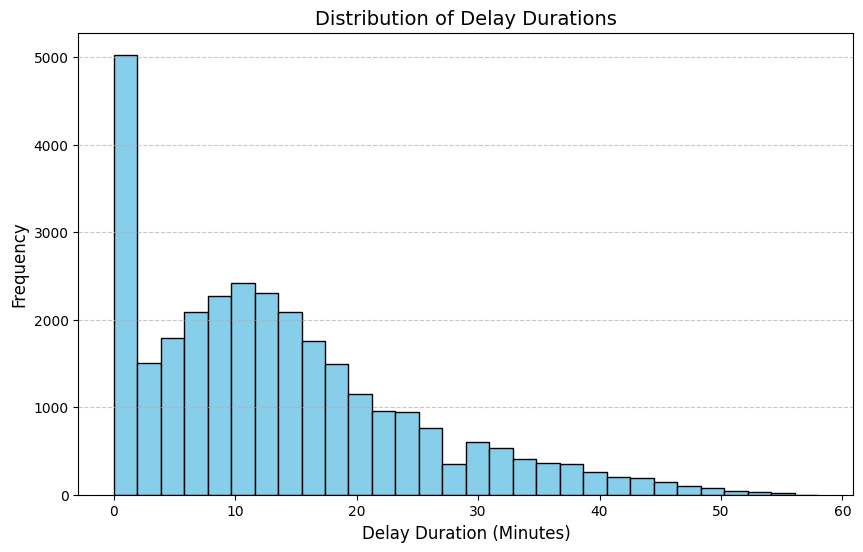

In [108]:
plt.figure(figsize=(10, 6))
plt.hist(train_data['delay_time_mins'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Delay Durations', fontsize=14)
plt.xlabel('Delay Duration (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Temporal Analysis: Line plots or bar charts showing delays across hours, days, or months


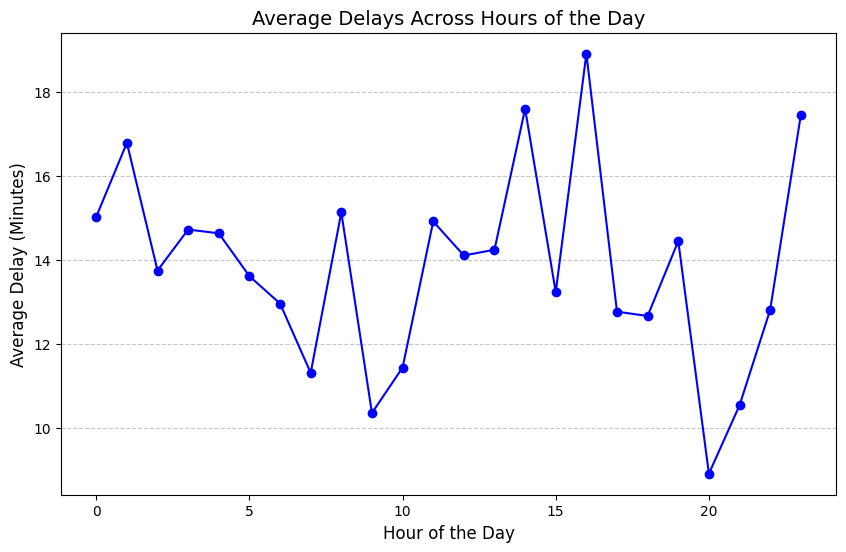

In [109]:
hourly_delays = train_data.groupby('Hour_of_Day')['delay_time_mins'].mean()

plt.figure(figsize=(10, 6))
hourly_delays.plot(kind='line', marker='o', color='blue')
plt.title('Average Delays Across Hours of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Delay (Minutes)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


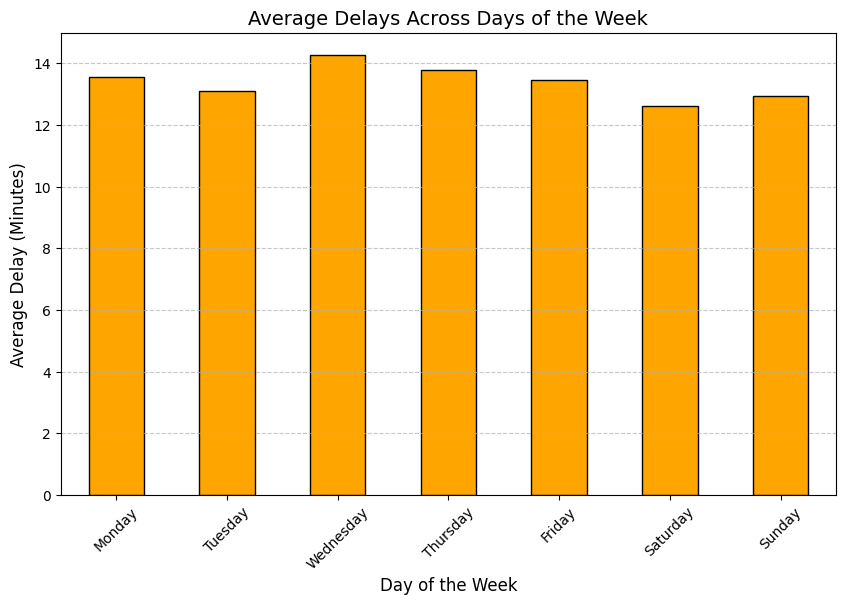

In [110]:
day_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 0: 'Sunday'}
train_data['Day_of_Week'] = train_data['Day_of_Week'].map(day_map)
daily_delays = train_data.groupby('Day_of_Week')['delay_time_mins'].mean()
daily_delays = daily_delays.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 6))
daily_delays.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Delays Across Days of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Delay (Minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

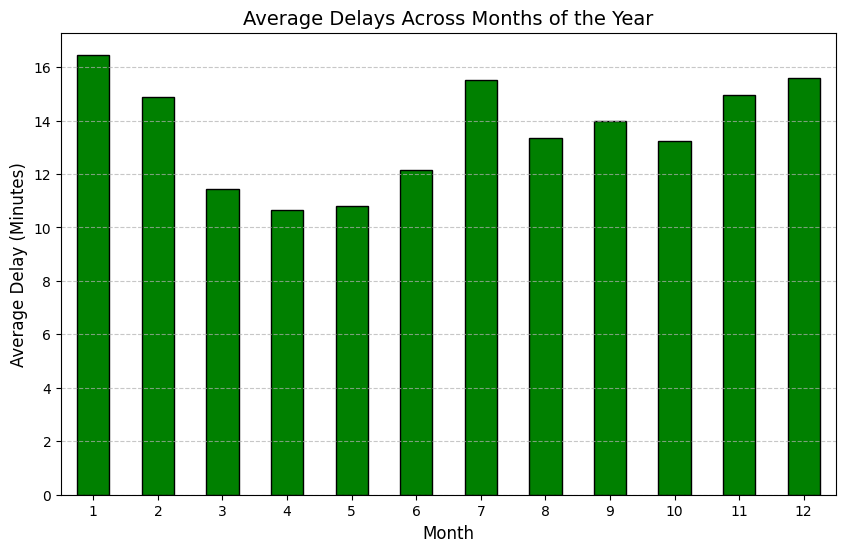

In [111]:
monthly_delays = train_data.groupby('Month_of_Year')['delay_time_mins'].mean()

plt.figure(figsize=(10, 6))
monthly_delays.plot(kind='bar', color='green', edgecolor='black')
plt.title('Average Delays Across Months of the Year', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Delay (Minutes)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Category-Wise Analysis: Group delays by airline, departure airport, or flight status.


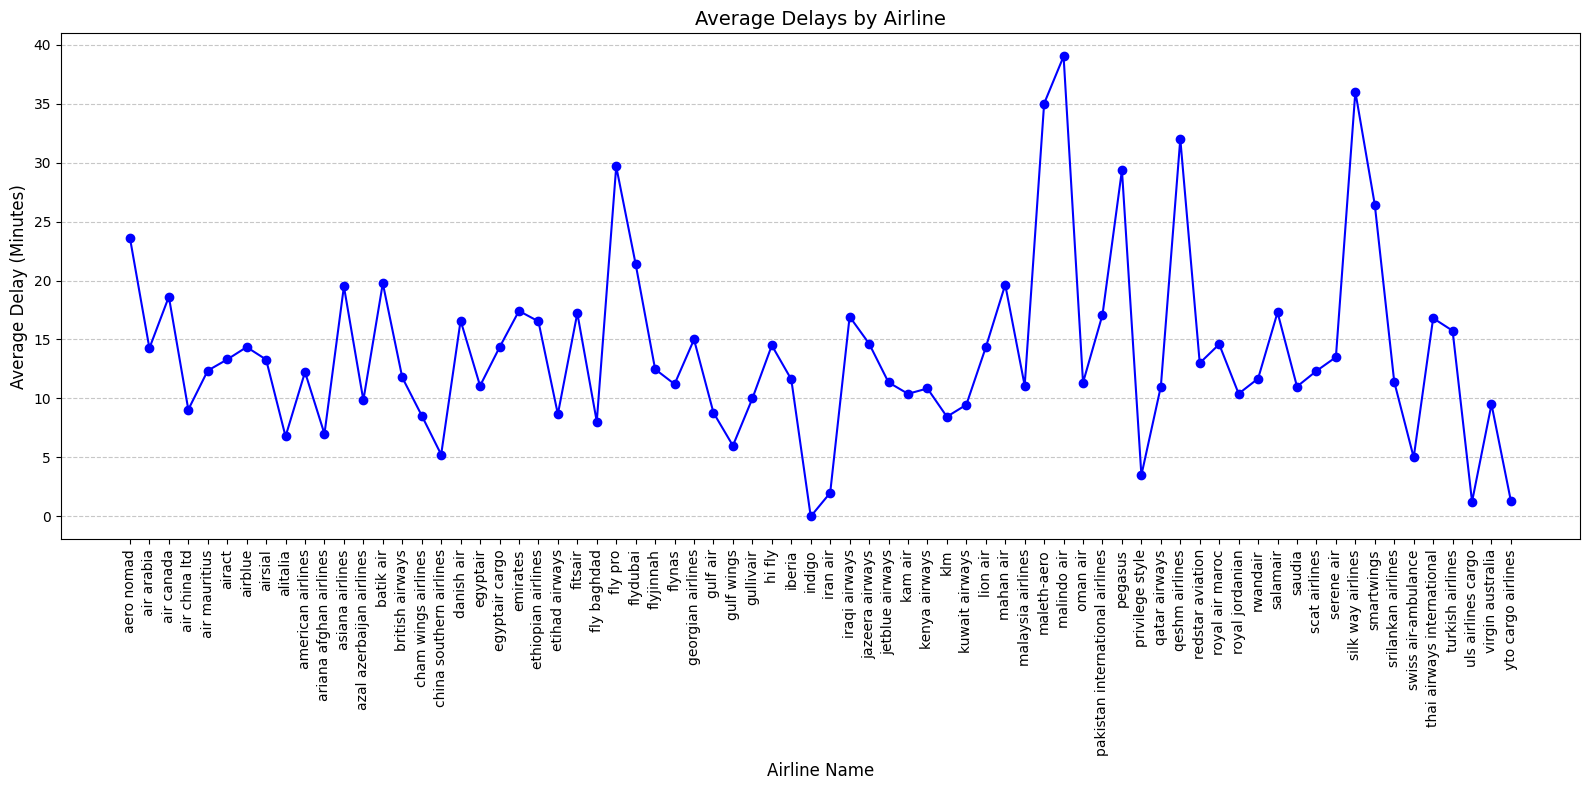

In [112]:
airline_delays = train_data.groupby('airline_name')['delay_time_mins'].mean()

plt.figure(figsize=(16, 8))
airline_delays.plot(kind='line', marker='o', color='blue')
plt.title('Average Delays by Airline', fontsize=14)
plt.xlabel('Airline Name', fontsize=12)
plt.ylabel('Average Delay (Minutes)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(ticks=range(len(airline_delays)), labels=airline_delays.index, rotation=90, fontsize=10)

plt.tight_layout()
plt.show()
train_data = train_data.drop(columns=['airline_name'])


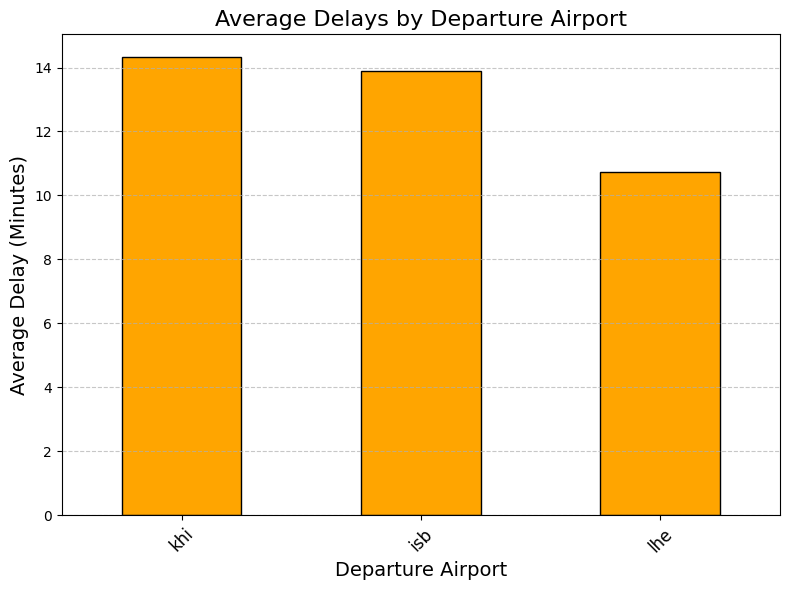

In [113]:
airport_delays = train_data.groupby('departure_iataCode')['delay_time_mins'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
airport_delays.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Delays by Departure Airport', fontsize=16)
plt.xlabel('Departure Airport', fontsize=14)
plt.ylabel('Average Delay (Minutes)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Correlation Analysis: The relationship between weather and flight data


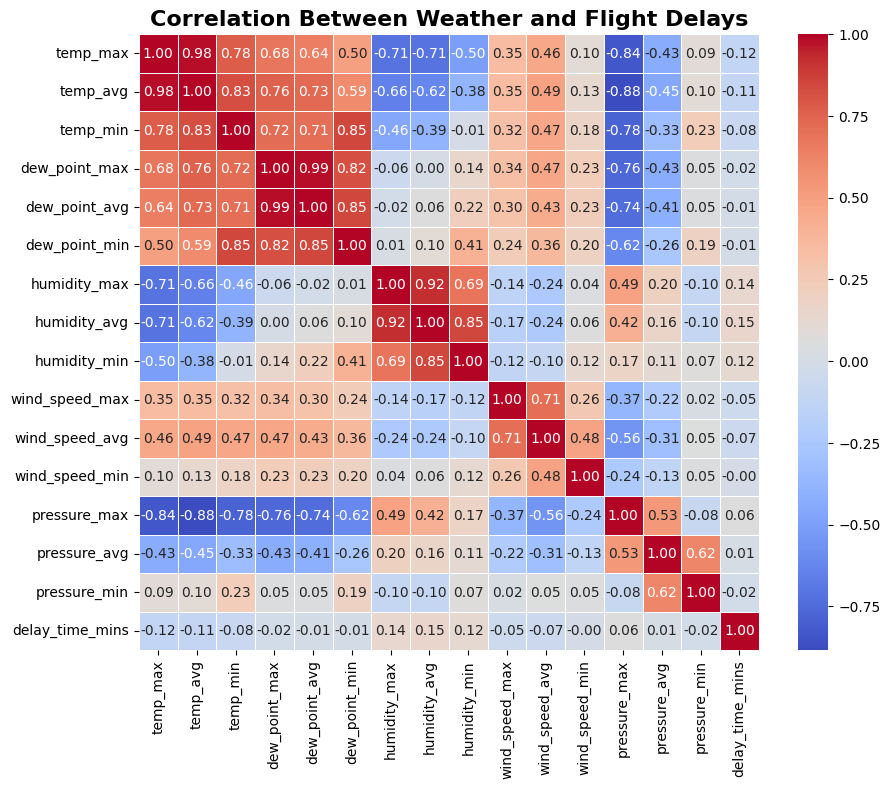

In [149]:
# weather_cols = ['temp_avg', 'dew_point_avg', 'humidity_avg', 'wind_speed_avg', 'pressure_avg', 'delay_time_mins']
weather_cols = ['temp_max', 'temp_avg', 'temp_min', 'dew_point_max', 'dew_point_avg',
       'dew_point_min', 'humidity_max', 'humidity_avg', 'humidity_min',
       'wind_speed_max', 'wind_speed_avg', 'wind_speed_min', 'pressure_max',
       'pressure_avg', 'pressure_min','delay_time_mins'
       ]
correlation_matrix = train_data[weather_cols].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Weather and Flight Delays', fontsize=16, weight='bold')
plt.show()

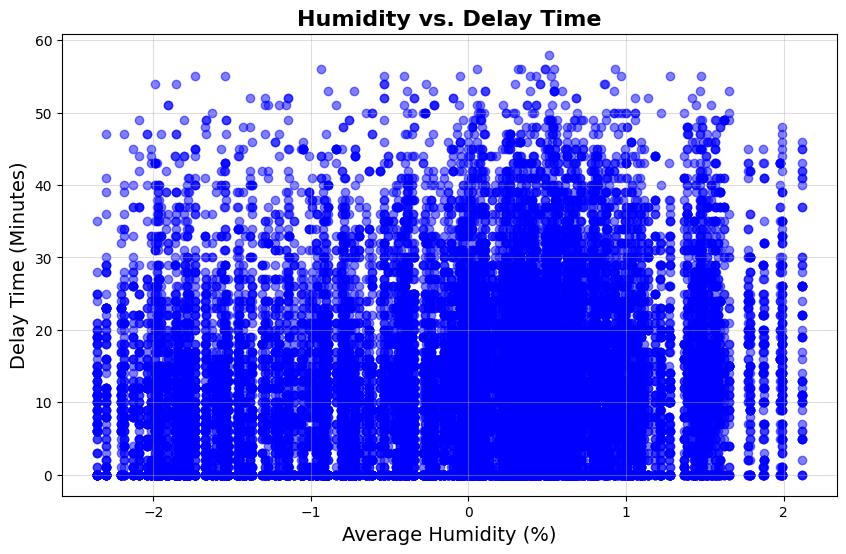

In [151]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data['humidity_avg'], train_data['delay_time_mins'], alpha=0.5, color='blue')
plt.title('Humidity vs. Delay Time', fontsize=16, weight='bold')
plt.xlabel('Average Humidity (%)', fontsize=14) 
plt.ylabel('Delay Time (Minutes)', fontsize=14)
plt.grid(alpha=0.4)
plt.show()

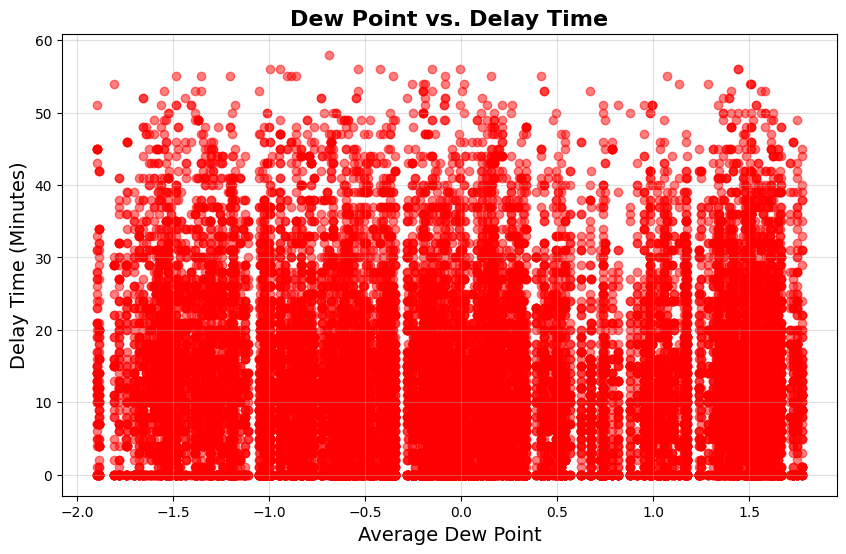

In [158]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data['dew_point_avg'], train_data['delay_time_mins'], alpha=0.5, color='red')
plt.title('Dew Point vs. Delay Time', fontsize=16, weight='bold')
plt.xlabel('Average Dew Point', fontsize=14)  
plt.ylabel('Delay Time (Minutes)', fontsize=14)
plt.grid(alpha=0.4)
plt.show()

### Comparison: Compare delays across training and testing datasets to check for data consistency


Training vs Testing Dataset Summary (Average Columns):
                Train_Count    Train_Mean  Train_Std  Train_Min  Train_25%  \
temp_avg            30205.0  1.957198e-16   1.000017  -2.102699  -0.839297   
dew_point_avg       30205.0 -8.431005e-16   1.000017  -1.896235  -0.801956   
humidity_avg        30205.0  1.806644e-16   1.000017  -2.356268  -0.720762   
wind_speed_avg      30205.0 -1.656090e-16   1.000017  -1.476856  -0.871696   
pressure_avg        30205.0  6.850192e-16   1.000017  -9.362872  -0.517883   

                Train_50%  Train_75%  Train_Max  Test_Count     Test_Mean  \
temp_avg         0.147103   0.788939   1.633460     12914.0 -5.061943e-16   
dew_point_avg   -0.075355   0.948891   1.771788     12914.0  4.577757e-16   
humidity_avg     0.212083   0.672447   2.114116     12914.0  5.370061e-16   
wind_speed_avg  -0.082356   0.706984   3.311806     12914.0 -4.841859e-17   
pressure_avg     0.071783   0.661449   1.251115     12914.0  7.619325e-15   

             

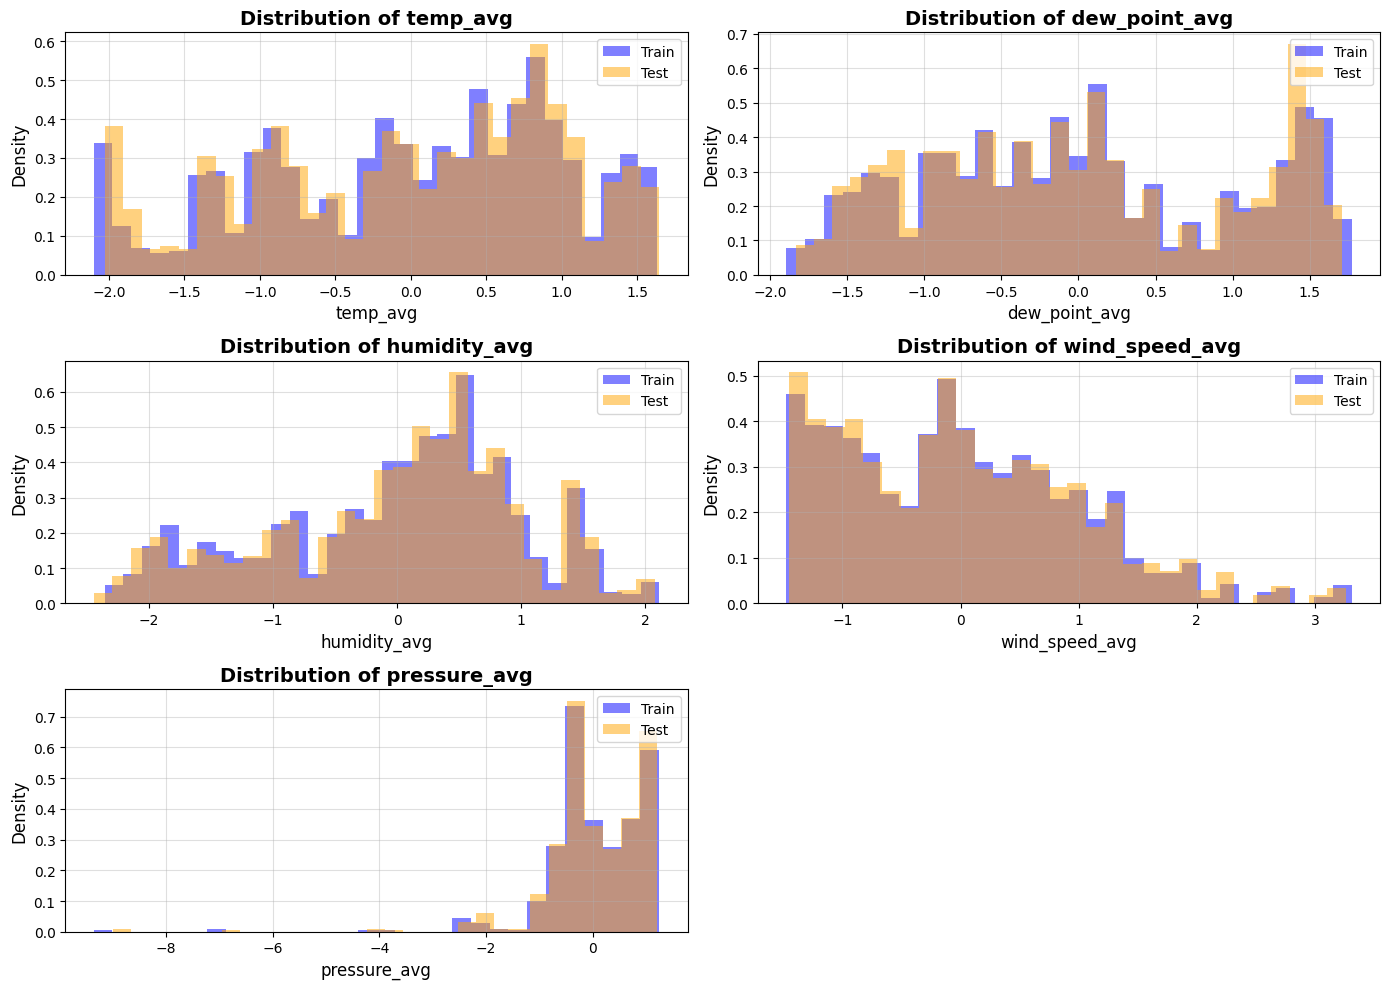

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

avg_columns = [
    'temp_avg', 'dew_point_avg', 'humidity_avg', 'wind_speed_avg', 'pressure_avg'
]

train_summary = train_data[avg_columns].describe().T
test_summary = test_data[avg_columns].describe().T

comparison_summary = pd.concat([train_summary, test_summary], axis=1, keys=['Train', 'Test'])

comparison_summary.columns = [
    'Train_Count', 'Train_Mean', 'Train_Std', 'Train_Min', 
    'Train_25%', 'Train_50%', 'Train_75%', 'Train_Max',
    'Test_Count', 'Test_Mean', 'Test_Std', 'Test_Min', 
    'Test_25%', 'Test_50%', 'Test_75%', 'Test_Max'
]

print("Training vs Testing Dataset Summary (Average Columns):")
print(comparison_summary)

comparison_summary.to_csv('Data/training_testing_avg_summary.csv')

num_plots = len(avg_columns)
fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(avg_columns):
    axes[i].hist(train_data[col], bins=30, alpha=0.5, label='Train', color='blue', density=True)
    axes[i].hist(test_data[col], bins=30, alpha=0.5, label='Test', color='orange', density=True)
    axes[i].set_title(f'Distribution of {col}', fontsize=14, weight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)
    axes[i].legend(loc='upper right')
    axes[i].grid(alpha=0.4)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Phase 3: Analytical and Predictive Tasks

### Classification Tasks: Binary Classification


In [63]:
test_data = pd.read_csv('Data/Standard_Test_Data.csv')
train_data = pd.read_csv('Data/Standard_Train_Data.csv')
train_data.head()

,airline_name,flight_number,type,Day_of_Week,Hour_of_Day,Minute,Month_of_Year,Year,status,departure_actualTime,...,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min,delay_time_mins,delayed
0,saudia,-0.631369,departure,3,20,50,7,2023,active,2023-07-20 20:15:00,...,0.920802,1.200242,-0.325909,-0.082356,-0.320806,-0.925523,-0.517883,0.256741,0.0,0
1,pakistan international airlines,-0.817372,departure,2,23,30,7,2023,active,2023-07-26 23:51:00,...,1.005606,0.981550,0.063025,0.654362,-0.320806,-0.925523,-0.223050,0.269579,21.0,1
2,fly baghdad,-0.768773,departure,0,10,45,7,2023,active,2023-07-24 10:54:00,...,0.817826,1.036223,0.918680,0.496494,-0.320806,-0.925523,-0.223050,0.269579,9.0,1
3,american airlines,2.007276,departure,3,3,30,7,2023,active,2023-07-27 03:36:00,...,1.387224,1.582953,-0.014762,0.496494,-0.320806,-0.925523,-0.223050,0.269579,6.0,1
4,virgin australia,1.269210,departure,6,9,55,7,2023,active,2023-07-23 10:00:00,...,0.630045,0.817531,-0.170335,0.654362,-0.320806,-0.470897,-0.223050,0.269579,5.0,1


Accuracy: 0.6897864591954974

Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.68      0.39       868
           1       0.93      0.69      0.79      5173

    accuracy                           0.69      6041
   macro avg       0.60      0.69      0.59      6041
weighted avg       0.83      0.69      0.73      6041



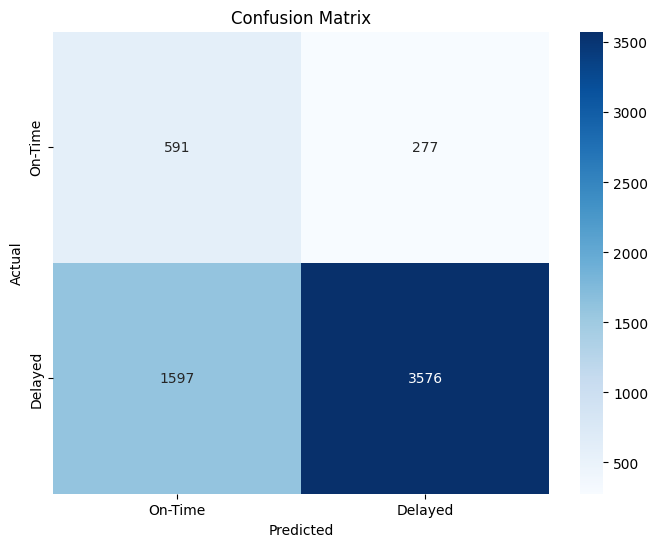

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['dew_point_max', 'dew_point_avg', 'dew_point_min', 
                    'humidity_max', 'humidity_avg', 'humidity_min', 'Day_of_Week', 'Hour_of_Day']
categorical_features = ['departure_iataCode', 'departure_icaoCode', 'arrival_iataCode', 'arrival_icaoCode']

features = numeric_features + categorical_features

train_data_subset = train_data[features + ['delayed']]

X_categorical = train_data_subset[categorical_features]
X_numeric = train_data_subset[numeric_features]
y = train_data_subset['delayed']

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(X_categorical)

X = np.hstack((X_numeric, X_categorical_encoded))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["On-Time", "Delayed"], yticklabels=["On-Time", "Delayed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Binary Classification Model Optimization and Evaluation


In [36]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

param_grid = {
    'penalty': ['l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced'],
    'max_iter': [100, 200]
}

model = LogisticRegression(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.6716601590207544


In [37]:
from sklearn.model_selection import cross_val_score

k_fold_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

print("K-Fold Cross-Validation Scores:", k_fold_scores)
print("Average K-Fold Accuracy:", k_fold_scores.mean())

K-Fold Cross-Validation Scores: [0.68094351 0.66376992 0.66977033 0.67142562 0.67425497]
Average K-Fold Accuracy: 0.6720328679895256


Logistic Regression Accuracy: 0.6897864591954974
Random Forest Accuracy: 0.9104452905148154
SVC Accuracy: 0.7063400099321304
Hypertrained Logistic Regression Model Accuracy: 0.6909452077470617

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.68      0.39       868
           1       0.93      0.69      0.79      5173

    accuracy                           0.69      6041
   macro avg       0.60      0.69      0.59      6041
weighted avg       0.83      0.69      0.73      6041

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.53      0.63       868
           1       0.93      0.97      0.95      5173

    accuracy                           0.91      6041
   macro avg       0.85      0.75      0.79      6041
weighted avg       0.90      0.91      0.90      6041

SVC Classification Report:
               precision    recall  f1-scor

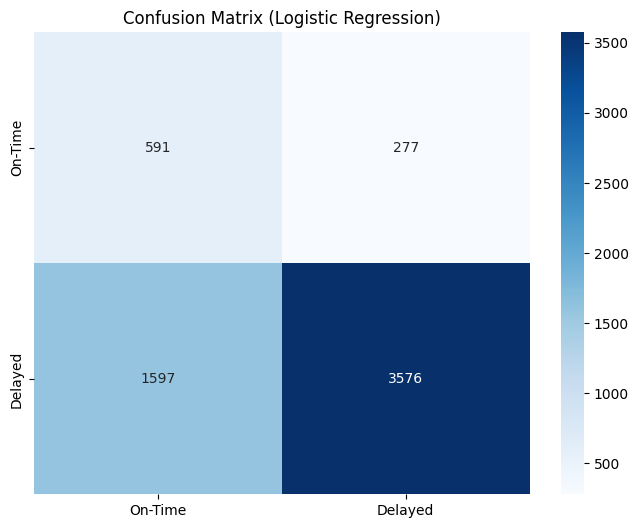

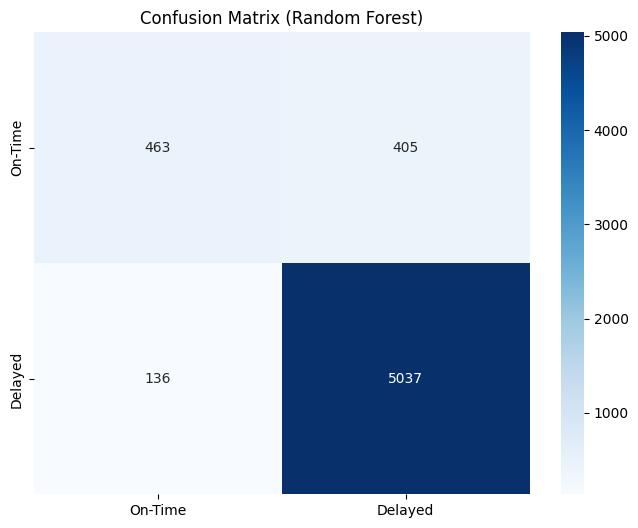

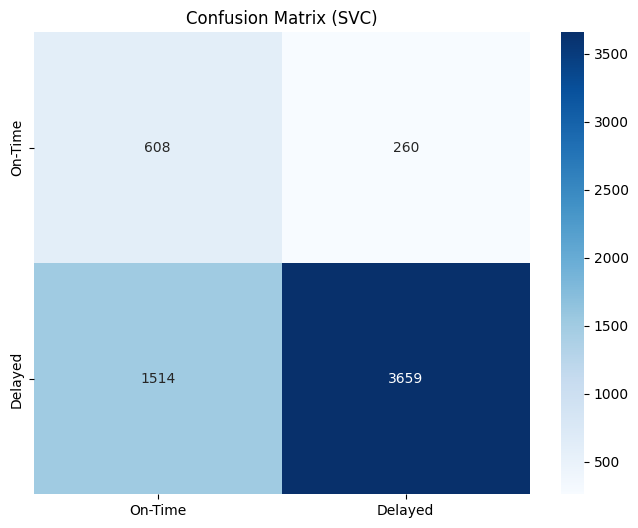

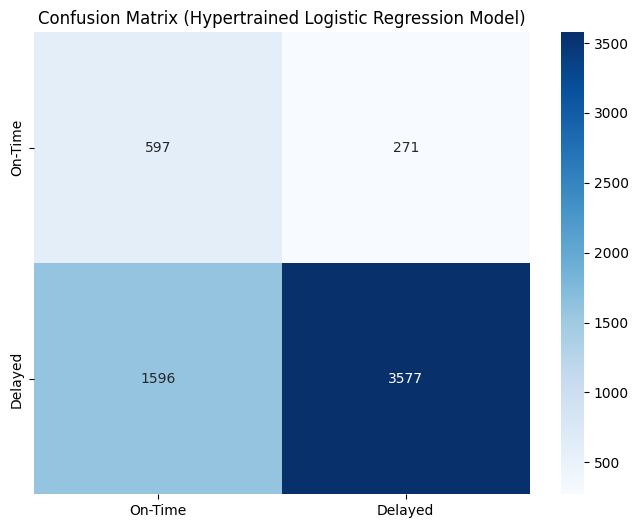

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

logreg_model = LogisticRegression(random_state=42, max_iter=100, class_weight='balanced')
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_val)

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)

svc_model = SVC(random_state=42, class_weight='balanced')
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_val)

hypertrained_logreg_model = best_model 
hypertrained_logreg_model.fit(X_train, y_train)
hypertrained_logreg_pred = hypertrained_logreg_model.predict(X_val)

print("Logistic Regression Accuracy:", accuracy_score(y_val, logreg_pred))
print("Random Forest Accuracy:", accuracy_score(y_val, rf_pred))
print("SVC Accuracy:", accuracy_score(y_val, svc_pred))
print("Hypertrained Logistic Regression Model Accuracy:", accuracy_score(y_val, hypertrained_logreg_pred))

print("\nLogistic Regression Classification Report:\n", classification_report(y_val, logreg_pred))
print("Random Forest Classification Report:\n", classification_report(y_val, rf_pred))
print("SVC Classification Report:\n", classification_report(y_val, svc_pred))
print("Hypertrained Logistic Regression Model Classification Report:\n", classification_report(y_val, hypertrained_logreg_pred))

cm_logreg = confusion_matrix(y_val, logreg_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=["On-Time", "Delayed"], yticklabels=["On-Time", "Delayed"])
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

cm_rf = confusion_matrix(y_val, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["On-Time", "Delayed"], yticklabels=["On-Time", "Delayed"])
plt.title("Confusion Matrix (Random Forest)")
plt.show()

cm_svc = confusion_matrix(y_val, svc_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", xticklabels=["On-Time", "Delayed"], yticklabels=["On-Time", "Delayed"])
plt.title("Confusion Matrix (SVC)")
plt.show()

cm_hypertrained_logreg = confusion_matrix(y_val, hypertrained_logreg_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_hypertrained_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=["On-Time", "Delayed"], yticklabels=["On-Time", "Delayed"])
plt.title("Confusion Matrix (Hypertrained Logistic Regression Model)")
plt.show()


### Binary Classification Model Testing


In [39]:
test_data_subset = test_data[categorical_features + numeric_features]

test_categorical = test_data_subset[categorical_features]
test_numerical = test_data_subset[numeric_features]

test_categorical_encoded = encoder.transform(test_categorical)

X_test = np.hstack((test_numerical, test_categorical_encoded))

y_test_pred = hypertrained_logreg_model.predict(X_test)

delay_labels = np.where(y_test_pred == 1, 'delayed', 'on-time')

output_df = pd.DataFrame({
    'ID': range(1, len(y_test_pred) + 1),
    'Delay': delay_labels
})

output_df.to_csv('Data/Binary_Classification_test_predictions.csv', index=False)

print("CSV file 'Binary_Classification_test_predictions.csv' created successfully with", len(y_test_pred), "rows!")


CSV file 'Binary_Classification_test_predictions.csv' created successfully with 12914 rows!


### Kaggle Submission


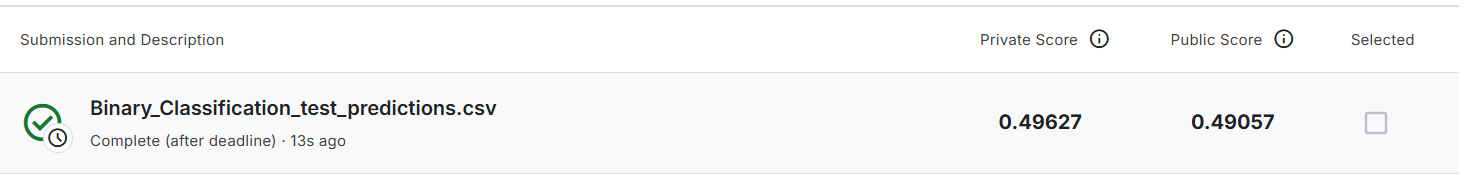

In [58]:
from IPython.display import Image, display
uploaded_image = 'Data/Binary Kaggle Submission.png'  
display(Image(filename=uploaded_image))


## Analytical and Predictive Tasks

### Classification Tasks: Multi-Class Classification


Accuracy: 0.4204601887104784

Classification Report:
                 precision    recall  f1-score   support

Moderate Delay       0.02      0.50      0.04        76
      No Delay       0.26      0.64      0.37       868
   Short Delay       0.89      0.38      0.54      5097

      accuracy                           0.42      6041
     macro avg       0.39      0.51      0.32      6041
  weighted avg       0.79      0.42      0.51      6041



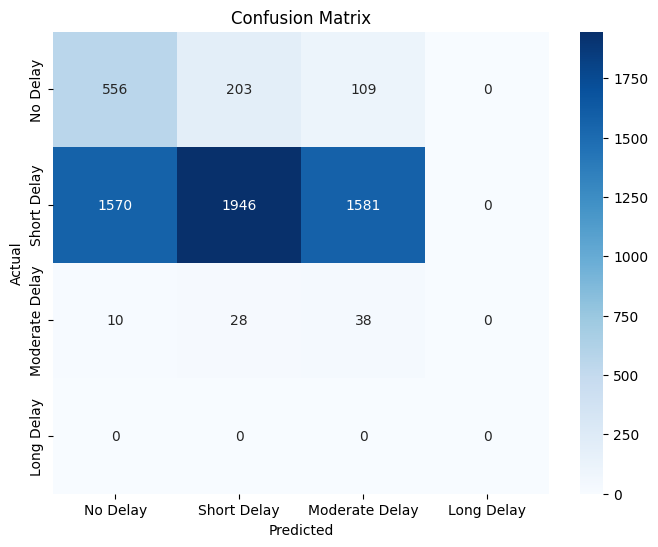

In [48]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=UserWarning, module='pandas')

numeric_features = ['dew_point_max', 'dew_point_avg', 'dew_point_min', 
                    'humidity_max', 'humidity_avg', 'humidity_min', 'Day_of_Week', 'Hour_of_Day']
categorical_features = ['departure_iataCode', 'departure_icaoCode', 'arrival_iataCode', 'arrival_icaoCode']

features = numeric_features + categorical_features

train_data_subset = train_data[features + ['delay_time_mins']].copy()

def categorize_delay(delay):
    if delay == 0:
        return 'No Delay'
    elif delay < 45:
        return 'Short Delay'
    elif delay <= 175:
        return 'Moderate Delay'
    else:
        return 'Long Delay'

train_data_subset['delay_category'] = train_data_subset['delay_time_mins'].apply(categorize_delay)

X_categorical = train_data_subset[categorical_features]
X_numeric = train_data_subset[numeric_features]
y = train_data_subset['delay_category']

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(X_categorical)

X = np.hstack((X_numeric, X_categorical_encoded))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42, class_weight='balanced', multi_class='multinomial', solver='saga')
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
classification_report_output = classification_report(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred, labels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'])

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_output)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'], 
            yticklabels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### Multi Classification Model Optimization and Evaluation


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.1, 1, 10], 
    'solver': ['lbfgs', 'saga'],  
    'class_weight': ['balanced'],  
    'max_iter': [100, 200]  }

model = LogisticRegression(random_state=42, multi_class='multinomial')

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END C=0.1, class_weight=balanced, max_iter=100, solver=lbfgs; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, max_iter=100, solver=lbfgs; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, max_iter=100, solver=lbfgs; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, max_iter=100, solver=saga; total time=   3.7s
[CV] END C=0.1, class_weight=balanced, max_iter=100, solver=saga; total time=   7.9s
[CV] END C=0.1, class_weight=balanced, max_iter=100, solver=saga; total time=   3.8s
[CV] END C=0.1, class_weight=balanced, max_iter=200, solver=lbfgs; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, max_iter=200, solver=lbfgs; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, max_iter=200, solver=lbfgs; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, max_iter=200, solver=saga; total time=  11.7s
[CV] END C=0.1, class_weight=balanced, max_iter=200, solver=saga; total time=  20.8

In [50]:
from sklearn.model_selection import cross_val_score
k_fold_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print("K-Fold Cross-Validation Scores:", k_fold_scores)
print("Average K-Fold Accuracy:", k_fold_scores.mean())

K-Fold Cross-Validation Scores: [0.5085868  0.52845024 0.3823712  0.2753983  0.46440397]
Average K-Fold Accuracy: 0.4318421023783783


Logistic Regression Accuracy: 0.4204601887104784
Random Forest Accuracy: 0.8990233405065386
SVC Accuracy: 0.41648733653368647
Hypertrained Logistic Regression Model Accuracy: 0.3688131104121834

Logistic Regression Classification Report:
                 precision    recall  f1-score   support

Moderate Delay       0.02      0.50      0.04        76
      No Delay       0.26      0.64      0.37       868
   Short Delay       0.89      0.38      0.54      5097

      accuracy                           0.42      6041
     macro avg       0.39      0.51      0.32      6041
  weighted avg       0.79      0.42      0.51      6041

Random Forest Classification Report:
                 precision    recall  f1-score   support

Moderate Delay       0.67      0.34      0.45        76
      No Delay       0.76      0.53      0.63       868
   Short Delay       0.92      0.97      0.94      5097

      accuracy                           0.90      6041
     macro avg       0.78      0.62      0.67 

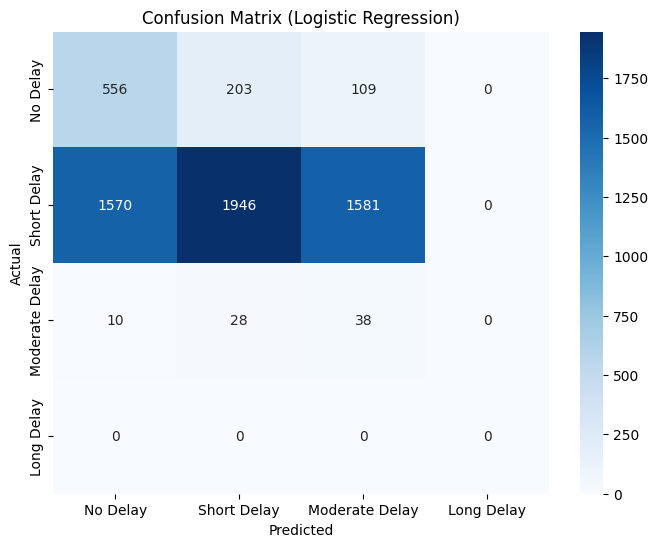

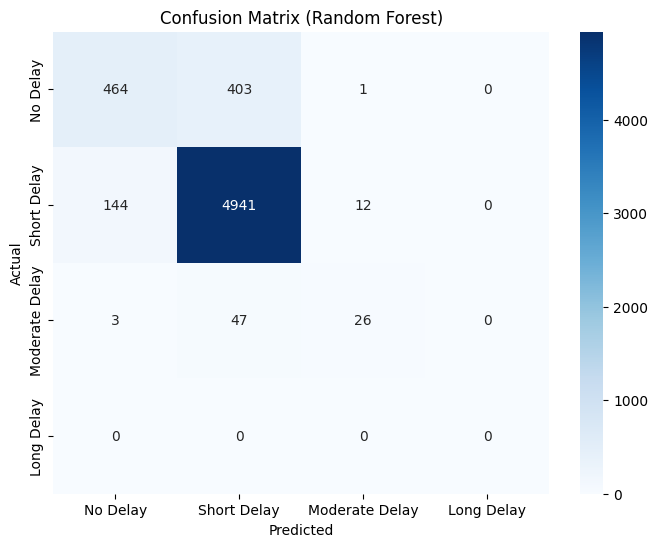

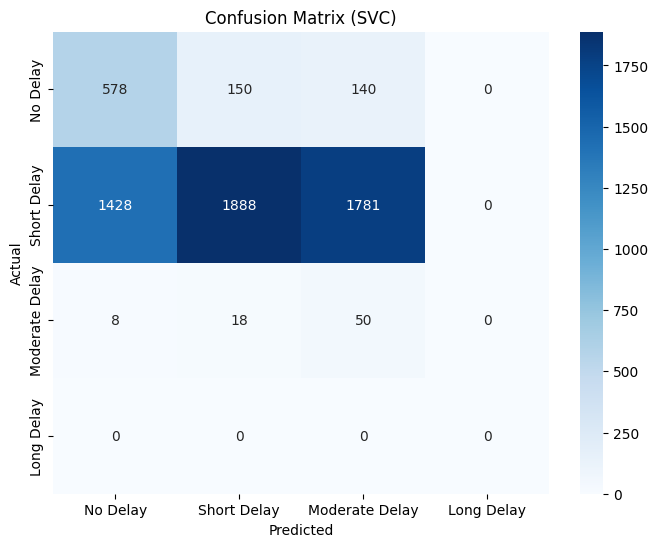

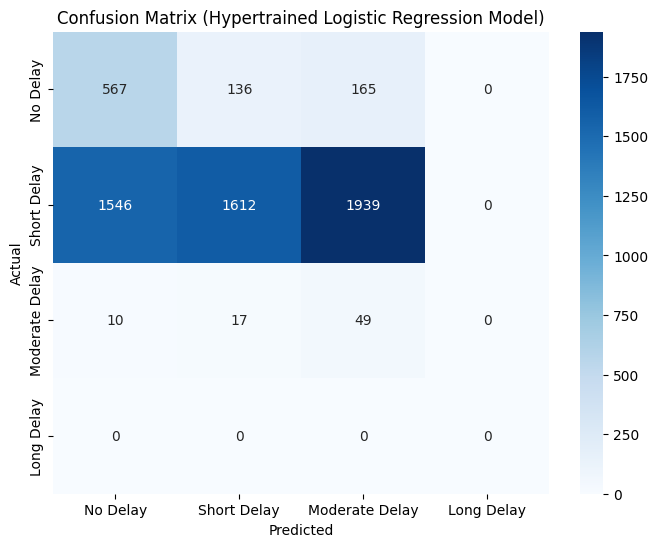

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

logreg_model = LogisticRegression(random_state=42, max_iter=100, class_weight='balanced', multi_class='multinomial', solver='saga')
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_val)

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)

svc_model = SVC(random_state=42, class_weight='balanced', decision_function_shape='ovr')
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_val)

hypertrained_logreg_model = best_model
hypertrained_logreg_model.fit(X_train, y_train)
hypertrained_logreg_pred = hypertrained_logreg_model.predict(X_val)

print("Logistic Regression Accuracy:", accuracy_score(y_val, logreg_pred))
print("Random Forest Accuracy:", accuracy_score(y_val, rf_pred))
print("SVC Accuracy:", accuracy_score(y_val, svc_pred))
print("Hypertrained Logistic Regression Model Accuracy:", accuracy_score(y_val, hypertrained_logreg_pred))

print("\nLogistic Regression Classification Report:\n", classification_report(y_val, logreg_pred))
print("Random Forest Classification Report:\n", classification_report(y_val, rf_pred))
print("SVC Classification Report:\n", classification_report(y_val, svc_pred))
print("Hypertrained Logistic Regression Model Classification Report:\n", classification_report(y_val, hypertrained_logreg_pred))

cm_logreg = confusion_matrix(y_val, logreg_pred, labels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'], yticklabels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'])
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm_rf = confusion_matrix(y_val, rf_pred, labels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'], yticklabels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'])
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm_svc = confusion_matrix(y_val, svc_pred, labels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", xticklabels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'], yticklabels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'])
plt.title("Confusion Matrix (SVC)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm_hypertrained_logreg = confusion_matrix(y_val, hypertrained_logreg_pred, labels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_hypertrained_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'], yticklabels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'])
plt.title("Confusion Matrix (Hypertrained Logistic Regression Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
test_data_subset = test_data[categorical_features + numeric_features]

test_categorical = test_data_subset[categorical_features]
test_numerical = test_data_subset[numeric_features]

test_categorical_encoded = encoder.transform(test_categorical)

X_test = np.hstack((test_numerical, test_categorical_encoded))

y_test_pred = best_model.predict(X_test)

output_df = pd.DataFrame({
    'ID': range(1, len(y_test_pred) + 1),
    'Delay_Category': y_test_pred
})

output_df.to_csv('Data/Multiclass_Classification_test_predictions.csv', index=False)

print("CSV file 'Multiclass_Classification_test_predictions.csv' created successfully with", len(y_test_pred), "rows!")


CSV file 'Multiclass_Classification_test_predictions.csv' created successfully with 12914 rows!


### Kaggle Submission


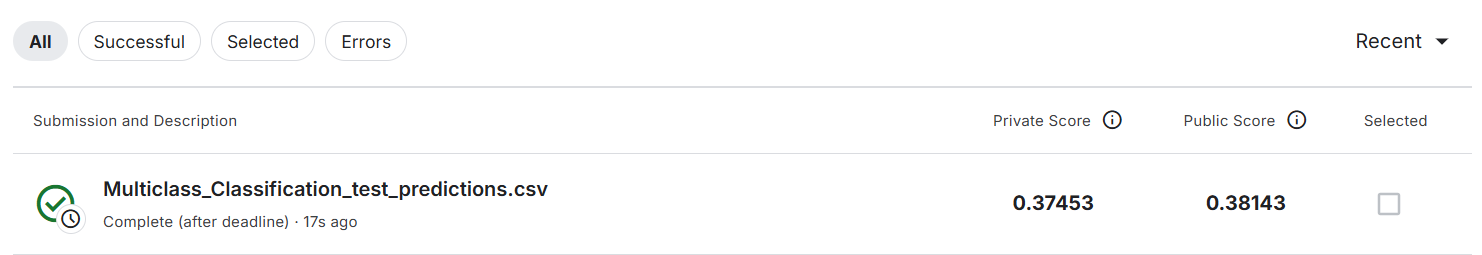

In [59]:
from IPython.display import Image, display
uploaded_image = 'Data/Multi Kaggle Submission.png'  
display(Image(filename=uploaded_image))



## Analytical and Predictive Tasks

### Regression Analysis: Delay Duration Prediction


In [66]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore", category=UserWarning, module='pandas')

numeric_features = ['dew_point_max', 'dew_point_avg', 'dew_point_min', 
                    'humidity_max', 'humidity_avg', 'humidity_min', 'Day_of_Week', 'Hour_of_Day']
categorical_features = ['departure_iataCode', 'departure_icaoCode', 'arrival_iataCode', 'arrival_icaoCode']

features = numeric_features + categorical_features

train_data_subset = train_data[features + ['delay_time_mins']].copy()

X_categorical = train_data_subset[categorical_features]
X_numeric = train_data_subset[numeric_features]
y = train_data_subset['delay_time_mins']

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(X_categorical)

X = np.hstack((X_numeric, X_categorical_encoded))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred_rf = rf_regressor.predict(X_val)

mae_rf = mean_absolute_error(y_val, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))

print("\nRandom Forest Regressor - Mean Absolute Error (MAE):", mae_rf)
print("Random Forest Regressor - Root Mean Squared Error (RMSE):", rmse_rf)


Random Forest Regressor - Mean Absolute Error (MAE): 5.580590058362612
Random Forest Regressor - Root Mean Squared Error (RMSE): 8.475543764894926


### Regression Analysis Model Optimization and Evaluation


In [70]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist, 
                                   n_iter=25, cv=5, scoring='neg_mean_absolute_error', verbose=3)

random_search.fit(X_train, y_train)

best_rf_regressor = random_search.best_estimator_

y_pred_rf = best_rf_regressor.predict(X_val)

mae_rf = mean_absolute_error(y_val, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))

print("\nBest Hyperparameters:", random_search.best_params_)
print("Random Forest Regressor - Mean Absolute Error (MAE):", mae_rf)
print("Random Forest Regressor - Root Mean Squared Error (RMSE):", rmse_rf)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=105;, score=-6.856 total time=   5.2s
[CV 2/5] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=105;, score=-6.900 total time=  13.2s
[CV 3/5] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=105;, score=-6.869 total time=  35.4s
[CV 4/5] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=105;, score=-6.857 total time=  22.9s
[CV 5/5] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=105;, score=-6.930 total time=  21.2s
[CV 1/5] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=182;, score=-7.408 total time=  12.3s
[CV 2/5] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=182;, scor

c:\Users\Hasnain Ibrar Butt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Hasnain Ibrar Butt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Hasnain Ibrar Butt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Hasnain Ibrar Butt\AppData\Local\Progra


Best Hyperparameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 126}
Random Forest Regressor - Mean Absolute Error (MAE): 6.0587818464367205
Random Forest Regressor - Root Mean Squared Error (RMSE): 8.651062047103094


In [79]:
from sklearn.model_selection import cross_val_score

k_fold_scores = cross_val_score(best_rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

print("K-Fold Cross-Validation Scores:", k_fold_scores)
print("Average K-Fold MAE:", -k_fold_scores.mean())

K-Fold Cross-Validation Scores: [-6.25698337 -6.30771936 -6.21179604 -6.17849228 -6.32242826]
Average K-Fold MAE: 6.2554838587727435


In [ ]:
test_data_subset = test_data[numeric_features + categorical_features]

test_categorical = test_data_subset[categorical_features]
test_numerical = test_data_subset[numeric_features]

test_categorical_encoded = encoder.transform(test_categorical)

X_test = np.hstack((test_numerical, test_categorical_encoded))

X_test_scaled = scaler.transform(X_test)

y_test_pred = best_rf_regressor.predict(X_test_scaled)

output_df = pd.DataFrame({
    'ID': range(1, len(y_test_pred) + 1),
    'Predicted_Delay_Time': y_test_pred
})

output_df.to_csv('Data/Regression_Analysis_test_predictions.csv', index=False)

print("CSV file 'Regression_Analysis_test_predictions.csv' created successfully with", len(y_test_pred), "rows!")


CSV file 'Regression_Analysis_test_predictions.csv' created successfully with 12914 rows!


### Kaggle Submission:


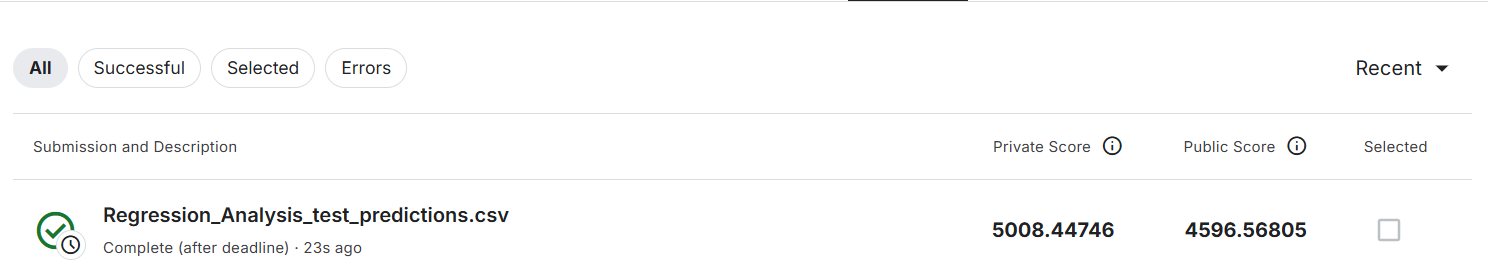

In [83]:
from IPython.display import Image, display
uploaded_image = 'Data/Regression Analysis Kaggle Submission.png'  
display(Image(filename=uploaded_image))